In [1]:
import multiprocessing

multiprocessing.cpu_count()

12

In [1]:
import sys
import argparse
import os
import gc
import pandas as pd
import numpy as np
import random
from math import floor, ceil

import cv2
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import GroupKFold, KFold, StratifiedKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold


import torch
from torchvision import datasets, models, transforms

import albumentations
from albumentations import pytorch as AT
from Augmentation import *

from DataSampler import *

In [14]:
data_path = "/media/jionie/my_disk/Kaggle/Bengaliai/input/bengaliai-cv19/"
image_df = pd.read_parquet(os.path.join(data_path, f'train_image_data_0.parquet'))

In [15]:
images = image_df.iloc[:, 1:].values.astype(np.uint8)
image_df['idx'] = image_df.index.values
id_dict = dict(zip(image_df.image_id, image_df.idx))
image_df = image_df.drop(["idx"], axis=1)

In [20]:
df = pd.read_csv("/media/jionie/my_disk/Kaggle/Bengaliai/input/bengaliai-cv19/split/MultilabelStratifiedKFold/train_fold_2_seed_2019.csv")
uid = df['image_id'].values

In [25]:
for idx in range(len(uid)):
    image_id = uid[idx]
    print(image_df[image_df["image_id"] == image_id].index, id_dict[image_id])

Int64Index([0], dtype='int64') 0
Int64Index([1], dtype='int64') 1
Int64Index([3], dtype='int64') 3
Int64Index([4], dtype='int64') 4
Int64Index([5], dtype='int64') 5
Int64Index([6], dtype='int64') 6
Int64Index([7], dtype='int64') 7
Int64Index([8], dtype='int64') 8
Int64Index([9], dtype='int64') 9
Int64Index([10], dtype='int64') 10
Int64Index([11], dtype='int64') 11
Int64Index([12], dtype='int64') 12
Int64Index([13], dtype='int64') 13
Int64Index([14], dtype='int64') 14
Int64Index([15], dtype='int64') 15
Int64Index([16], dtype='int64') 16
Int64Index([17], dtype='int64') 17
Int64Index([18], dtype='int64') 18
Int64Index([19], dtype='int64') 19
Int64Index([20], dtype='int64') 20
Int64Index([21], dtype='int64') 21
Int64Index([22], dtype='int64') 22
Int64Index([24], dtype='int64') 24
Int64Index([25], dtype='int64') 25
Int64Index([26], dtype='int64') 26
Int64Index([27], dtype='int64') 27
Int64Index([28], dtype='int64') 28
Int64Index([29], dtype='int64') 29
Int64Index([30], dtype='int64') 30
Int

Int64Index([245], dtype='int64') 245
Int64Index([246], dtype='int64') 246
Int64Index([247], dtype='int64') 247
Int64Index([248], dtype='int64') 248
Int64Index([249], dtype='int64') 249
Int64Index([250], dtype='int64') 250
Int64Index([251], dtype='int64') 251
Int64Index([252], dtype='int64') 252
Int64Index([253], dtype='int64') 253
Int64Index([254], dtype='int64') 254
Int64Index([255], dtype='int64') 255
Int64Index([256], dtype='int64') 256
Int64Index([257], dtype='int64') 257
Int64Index([258], dtype='int64') 258
Int64Index([260], dtype='int64') 260
Int64Index([261], dtype='int64') 261
Int64Index([262], dtype='int64') 262
Int64Index([263], dtype='int64') 263
Int64Index([264], dtype='int64') 264
Int64Index([265], dtype='int64') 265
Int64Index([266], dtype='int64') 266
Int64Index([267], dtype='int64') 267
Int64Index([268], dtype='int64') 268
Int64Index([269], dtype='int64') 269
Int64Index([270], dtype='int64') 270
Int64Index([271], dtype='int64') 271
Int64Index([272], dtype='int64') 272
I

Int64Index([494], dtype='int64') 494
Int64Index([495], dtype='int64') 495
Int64Index([496], dtype='int64') 496
Int64Index([497], dtype='int64') 497
Int64Index([498], dtype='int64') 498
Int64Index([499], dtype='int64') 499
Int64Index([501], dtype='int64') 501
Int64Index([502], dtype='int64') 502
Int64Index([503], dtype='int64') 503
Int64Index([505], dtype='int64') 505
Int64Index([506], dtype='int64') 506
Int64Index([507], dtype='int64') 507
Int64Index([508], dtype='int64') 508
Int64Index([509], dtype='int64') 509
Int64Index([510], dtype='int64') 510
Int64Index([511], dtype='int64') 511
Int64Index([512], dtype='int64') 512
Int64Index([513], dtype='int64') 513
Int64Index([514], dtype='int64') 514
Int64Index([515], dtype='int64') 515
Int64Index([516], dtype='int64') 516
Int64Index([517], dtype='int64') 517
Int64Index([518], dtype='int64') 518
Int64Index([519], dtype='int64') 519
Int64Index([520], dtype='int64') 520
Int64Index([522], dtype='int64') 522
Int64Index([524], dtype='int64') 524
I

Int64Index([768], dtype='int64') 768
Int64Index([769], dtype='int64') 769
Int64Index([770], dtype='int64') 770
Int64Index([771], dtype='int64') 771
Int64Index([772], dtype='int64') 772
Int64Index([773], dtype='int64') 773
Int64Index([774], dtype='int64') 774
Int64Index([776], dtype='int64') 776
Int64Index([777], dtype='int64') 777
Int64Index([778], dtype='int64') 778
Int64Index([779], dtype='int64') 779
Int64Index([780], dtype='int64') 780
Int64Index([781], dtype='int64') 781
Int64Index([784], dtype='int64') 784
Int64Index([785], dtype='int64') 785
Int64Index([786], dtype='int64') 786
Int64Index([787], dtype='int64') 787
Int64Index([788], dtype='int64') 788
Int64Index([789], dtype='int64') 789
Int64Index([790], dtype='int64') 790
Int64Index([791], dtype='int64') 791
Int64Index([792], dtype='int64') 792
Int64Index([793], dtype='int64') 793
Int64Index([794], dtype='int64') 794
Int64Index([795], dtype='int64') 795
Int64Index([796], dtype='int64') 796
Int64Index([798], dtype='int64') 798
I

Int64Index([1040], dtype='int64') 1040
Int64Index([1041], dtype='int64') 1041
Int64Index([1042], dtype='int64') 1042
Int64Index([1043], dtype='int64') 1043
Int64Index([1044], dtype='int64') 1044
Int64Index([1045], dtype='int64') 1045
Int64Index([1046], dtype='int64') 1046
Int64Index([1047], dtype='int64') 1047
Int64Index([1048], dtype='int64') 1048
Int64Index([1049], dtype='int64') 1049
Int64Index([1050], dtype='int64') 1050
Int64Index([1051], dtype='int64') 1051
Int64Index([1053], dtype='int64') 1053
Int64Index([1054], dtype='int64') 1054
Int64Index([1055], dtype='int64') 1055
Int64Index([1056], dtype='int64') 1056
Int64Index([1057], dtype='int64') 1057
Int64Index([1059], dtype='int64') 1059
Int64Index([1060], dtype='int64') 1060
Int64Index([1061], dtype='int64') 1061
Int64Index([1062], dtype='int64') 1062
Int64Index([1063], dtype='int64') 1063
Int64Index([1064], dtype='int64') 1064
Int64Index([1065], dtype='int64') 1065
Int64Index([1066], dtype='int64') 1066
Int64Index([1067], dtype=

Int64Index([1303], dtype='int64') 1303
Int64Index([1305], dtype='int64') 1305
Int64Index([1306], dtype='int64') 1306
Int64Index([1307], dtype='int64') 1307
Int64Index([1308], dtype='int64') 1308
Int64Index([1311], dtype='int64') 1311
Int64Index([1312], dtype='int64') 1312
Int64Index([1313], dtype='int64') 1313
Int64Index([1314], dtype='int64') 1314
Int64Index([1315], dtype='int64') 1315
Int64Index([1316], dtype='int64') 1316
Int64Index([1317], dtype='int64') 1317
Int64Index([1318], dtype='int64') 1318
Int64Index([1319], dtype='int64') 1319
Int64Index([1320], dtype='int64') 1320
Int64Index([1322], dtype='int64') 1322
Int64Index([1323], dtype='int64') 1323
Int64Index([1324], dtype='int64') 1324
Int64Index([1325], dtype='int64') 1325
Int64Index([1326], dtype='int64') 1326
Int64Index([1327], dtype='int64') 1327
Int64Index([1328], dtype='int64') 1328
Int64Index([1330], dtype='int64') 1330
Int64Index([1331], dtype='int64') 1331
Int64Index([1332], dtype='int64') 1332
Int64Index([1333], dtype=

Int64Index([1579], dtype='int64') 1579
Int64Index([1582], dtype='int64') 1582
Int64Index([1583], dtype='int64') 1583
Int64Index([1584], dtype='int64') 1584
Int64Index([1585], dtype='int64') 1585
Int64Index([1586], dtype='int64') 1586
Int64Index([1587], dtype='int64') 1587
Int64Index([1588], dtype='int64') 1588
Int64Index([1589], dtype='int64') 1589
Int64Index([1590], dtype='int64') 1590
Int64Index([1591], dtype='int64') 1591
Int64Index([1592], dtype='int64') 1592
Int64Index([1593], dtype='int64') 1593
Int64Index([1594], dtype='int64') 1594
Int64Index([1595], dtype='int64') 1595
Int64Index([1596], dtype='int64') 1596
Int64Index([1598], dtype='int64') 1598
Int64Index([1599], dtype='int64') 1599
Int64Index([1600], dtype='int64') 1600
Int64Index([1602], dtype='int64') 1602
Int64Index([1603], dtype='int64') 1603
Int64Index([1604], dtype='int64') 1604
Int64Index([1605], dtype='int64') 1605
Int64Index([1606], dtype='int64') 1606
Int64Index([1607], dtype='int64') 1607
Int64Index([1608], dtype=

Int64Index([1837], dtype='int64') 1837
Int64Index([1838], dtype='int64') 1838
Int64Index([1839], dtype='int64') 1839
Int64Index([1840], dtype='int64') 1840
Int64Index([1841], dtype='int64') 1841
Int64Index([1842], dtype='int64') 1842
Int64Index([1843], dtype='int64') 1843
Int64Index([1844], dtype='int64') 1844
Int64Index([1845], dtype='int64') 1845
Int64Index([1846], dtype='int64') 1846
Int64Index([1847], dtype='int64') 1847
Int64Index([1848], dtype='int64') 1848
Int64Index([1849], dtype='int64') 1849
Int64Index([1851], dtype='int64') 1851
Int64Index([1852], dtype='int64') 1852
Int64Index([1854], dtype='int64') 1854
Int64Index([1855], dtype='int64') 1855
Int64Index([1856], dtype='int64') 1856
Int64Index([1857], dtype='int64') 1857
Int64Index([1858], dtype='int64') 1858
Int64Index([1859], dtype='int64') 1859
Int64Index([1861], dtype='int64') 1861
Int64Index([1862], dtype='int64') 1862
Int64Index([1863], dtype='int64') 1863
Int64Index([1864], dtype='int64') 1864
Int64Index([1865], dtype=

Int64Index([2092], dtype='int64') 2092
Int64Index([2093], dtype='int64') 2093
Int64Index([2094], dtype='int64') 2094
Int64Index([2095], dtype='int64') 2095
Int64Index([2096], dtype='int64') 2096
Int64Index([2097], dtype='int64') 2097
Int64Index([2098], dtype='int64') 2098
Int64Index([2099], dtype='int64') 2099
Int64Index([2100], dtype='int64') 2100
Int64Index([2101], dtype='int64') 2101
Int64Index([2102], dtype='int64') 2102
Int64Index([2103], dtype='int64') 2103
Int64Index([2104], dtype='int64') 2104
Int64Index([2105], dtype='int64') 2105
Int64Index([2107], dtype='int64') 2107
Int64Index([2108], dtype='int64') 2108
Int64Index([2109], dtype='int64') 2109
Int64Index([2111], dtype='int64') 2111
Int64Index([2112], dtype='int64') 2112
Int64Index([2113], dtype='int64') 2113
Int64Index([2114], dtype='int64') 2114
Int64Index([2115], dtype='int64') 2115
Int64Index([2116], dtype='int64') 2116
Int64Index([2117], dtype='int64') 2117
Int64Index([2118], dtype='int64') 2118
Int64Index([2119], dtype=

Int64Index([2345], dtype='int64') 2345
Int64Index([2347], dtype='int64') 2347
Int64Index([2348], dtype='int64') 2348
Int64Index([2349], dtype='int64') 2349
Int64Index([2350], dtype='int64') 2350
Int64Index([2351], dtype='int64') 2351
Int64Index([2352], dtype='int64') 2352
Int64Index([2353], dtype='int64') 2353
Int64Index([2354], dtype='int64') 2354
Int64Index([2355], dtype='int64') 2355
Int64Index([2356], dtype='int64') 2356
Int64Index([2357], dtype='int64') 2357
Int64Index([2359], dtype='int64') 2359
Int64Index([2360], dtype='int64') 2360
Int64Index([2361], dtype='int64') 2361
Int64Index([2362], dtype='int64') 2362
Int64Index([2364], dtype='int64') 2364
Int64Index([2365], dtype='int64') 2365
Int64Index([2366], dtype='int64') 2366
Int64Index([2367], dtype='int64') 2367
Int64Index([2368], dtype='int64') 2368
Int64Index([2369], dtype='int64') 2369
Int64Index([2370], dtype='int64') 2370
Int64Index([2371], dtype='int64') 2371
Int64Index([2372], dtype='int64') 2372
Int64Index([2374], dtype=

KeyboardInterrupt: 

In [16]:
image_id = "Train_0"
IMAGE_HEIGHT, IMAGE_WIDTH = 137, 236
image = image_df.loc[image_df["image_id"] == image_id, image_df.columns[1:]].values.reshape(IMAGE_HEIGHT, IMAGE_WIDTH)

In [17]:
image_new = images[id_dict[image_id]].reshape(IMAGE_HEIGHT, IMAGE_WIDTH)

In [19]:
np.sum(image - image_new)

0

In [4]:
IMAGE_HEIGHT, IMAGE_WIDTH = 137, 236
IMAGE_HEIGHT_RESIZE, IMAGE_WIDTH_RESIZE = 64, 112

def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

def crop_resize(img0, size=128, pad=16):
    #crop a box around pixels large than the threshold 
    #some images contain line at the sides
    ymin,ymax,xmin,xmax = bbox(img0[5:-5,5:-5] > 60)
    #cropping may cut too much, so we need to add it back
    xmin = xmin - 13 if (xmin > 13) else 0
    ymin = ymin - 10 if (ymin > 10) else 0
    xmax = xmax + 13 if (xmax < IMAGE_WIDTH - 13) else IMAGE_WIDTH
    ymax = ymax + 10 if (ymax < IMAGE_HEIGHT - 10) else IMAGE_HEIGHT
    img = img0[ymin:ymax,xmin:xmax]
    #remove lo intensity pixels as noise
    img[img < 28] = 0
    lx, ly = xmax-xmin,ymax-ymin
    l = max(lx,ly) + pad
    #make sure that the aspect ratio is kept in rescaling
    img = np.pad(img, [((l-ly)//2,), ((l-lx)//2,)], mode='constant')
    return cv2.resize(img,(size,size))

In [5]:
train_transform = albumentations.Compose([
    albumentations.Rotate(limit=20, p=0.5),
    albumentations.Cutout(num_holes=4, max_h_size=4, max_w_size=4, fill_value=0, p=1),
    albumentations.ShiftScaleRotate(shift_limit=0.03, scale_limit=0.1, rotate_limit=5, p=0.5),
    albumentations.GridDistortion(distort_limit=0.3, p=0.5), 
    albumentations.Resize(IMAGE_HEIGHT_RESIZE, IMAGE_WIDTH_RESIZE),
    ])


test_transform = albumentations.Compose([
    albumentations.Resize(IMAGE_HEIGHT_RESIZE, IMAGE_WIDTH_RESIZE),
    ])

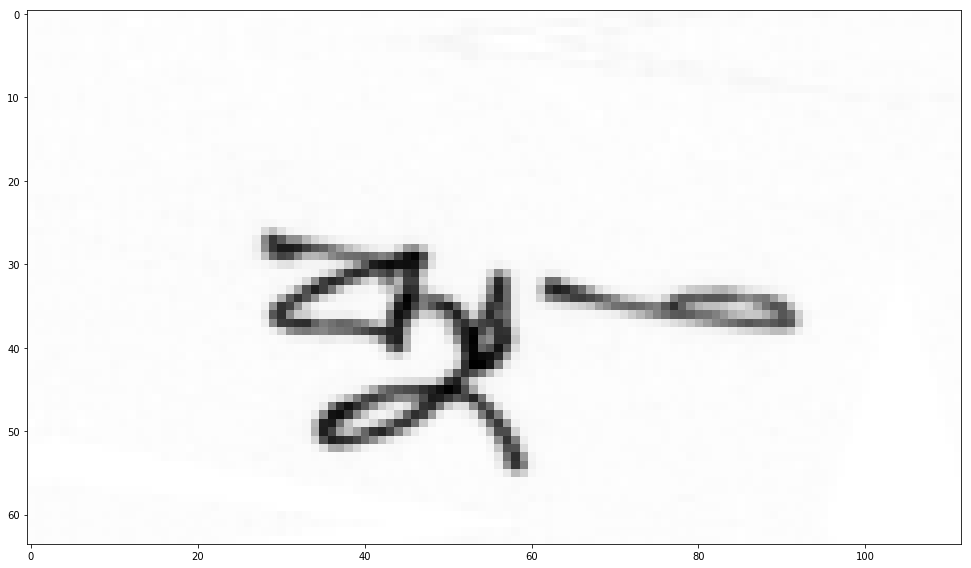

<Figure size 432x288 with 0 Axes>

In [6]:
image = image_df.loc[image_df['image_id']=="Train_14", image_df.columns[1:]].values.reshape(IMAGE_HEIGHT, IMAGE_WIDTH)
image = 255 - image
# image = crop_resize(image)

image = do_random_projective(image, 0.3)
image = do_random_perspective(image, 0.3)
# image = do_random_erode(image, 0.5)
# image = do_random_dilate(image, 0.5)
              
# image = np.repeat(np.expand_dims(image, axis=2), 3, axis=2).astype('uint8')
# image = augment_and_mix(image, severity=1, width=1, depth=-1, alpha=1.)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = train_transform(image=image)['image']
image = image / np.max(image)

# val_transform
nrow, ncol = 1, 1
fig, ax = plt.subplots(nrow, ncol, figsize=(20, 8))
ax.imshow(image, cmap='Greys')
plt.tight_layout()
plt.show()
plt.savefig('bengaliai.png')

In [7]:
class bengaliai_Dataset(torch.utils.data.Dataset):
    def __init__(self, \
                data_path, \
                df, \
                mode='train', \
                labeled=True, \
                transform = transforms.Compose([transforms.RandomResizedCrop(128),transforms.ToTensor()]), \
                grapheme_root_labels_dict={}, \
                vowel_diacritic_labels_dict={}, \
                consonant_diacritic_labels_dict={}, \
                grapheme_labels_dict={}):

        self.data_path = data_path
        self.df = df
        self.mode = mode
        self.labeled = labeled
        self.transform = transform
        self.image_df = pd.concat([pd.read_parquet(os.path.join(data_path, f'train_image_data_{i}.parquet')) for i in range(4)]).reindex()
        self.image_df.iloc[:, 1:] = self.image_df.iloc[:, 1:].astype(np.uint8)
        if self.labeled:
            self.uid = self.df['image_id'].values
        else:
            # we don't need to spilt
            self.uid = self.image_df['image_id'].values
        # self.image = self.image_df.drop('image_id', axis=1).values.astype(np.uint8)
    
        self.grapheme_root_labels_dict = grapheme_root_labels_dict
        self.vowel_diacritic_labels_dict = vowel_diacritic_labels_dict
        self.consonant_diacritic_labels_dict = consonant_diacritic_labels_dict
        self.grapheme_labels_dict = grapheme_labels_dict
        

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        
        image_id = self.uid[idx]
        # image = self.image[idx].copy().reshape(IMAGE_HEIGHT, IMAGE_WIDTH)
        image = \
            self.image_df.loc[self.image_df["image_id"] == image_id, self.image_df.columns[1:]].values.reshape(IMAGE_HEIGHT, IMAGE_WIDTH)
            
        image = 255 - image
#         image = crop_resize(image)
        
#         if ((self.mode == 'train') and (np.random.uniform() < 0.5)):
#             image = np.repeat(np.expand_dims(image, axis=2), 3, axis=2).astype('uint8')
#             image = augment_and_mix(image, severity=1, width=1, depth=1, alpha=1.)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
        image = np.float32(image)
        
        if (self.mode == 'train'):
            
            for op in np.random.choice([
                lambda image : do_identity(image),
#                 lambda image : do_random_projective(image, 0.5),
                lambda image : do_random_perspective(image, 0.5),
            ],1):
                image = op(image)

            for op in np.random.choice([
                lambda image : do_identity(image),
#                 lambda image : do_random_erode(image, 0.5),
#                 lambda image : do_random_dilate(image, 0.5),
            ],1):
                image = op(image)
        
        if not (self.transform is None):
            
            image = self.transform(image=np.float32(image))['image']
            
        image = np.repeat(np.expand_dims(image, axis=0), 3, axis=0).astype(np.float32)
        image = image / np.max(image)
        
        if self.labeled:
            
            return image, \
                self.grapheme_root_labels_dict[image_id], \
                self.vowel_diacritic_labels_dict[image_id], \
                self.consonant_diacritic_labels_dict[image_id], \
                self.grapheme_labels_dict[image_id]
        else:
            return image

In [8]:
def get_train_val_dataset(data_path="/media/jionie/my_disk/Kaggle/Bengaliai/input/bengaliai-cv19/", \
                        train_df="/media/jionie/my_disk/Kaggle/Bengaliai/input/bengaliai-cv19/split/MultilabelStratifiedKFold/train_fold_0_seed_12.csv", \
                        val_data_path="/media/jionie/my_disk/Kaggle/Bengaliai/input/bengaliai-cv19/", \
                        val_df="/media/jionie/my_disk/Kaggle/Bengaliai/input/bengaliai-cv19/split/MultilabelStratifiedKFold/val_fold_0_seed_12.csv", \
                        batch_size=4, \
                        val_batch_size=4, \
                        num_workers=2, \
                        train_transform=None, \
                        val_transform=None, \
                        Balanced="ImbalancedDatasetSampler"):
    

    
    train_df = pd.read_csv(train_df, encoding='utf8')
    val_df = pd.read_csv(val_df, encoding='utf8')
    df = pd.concat([train_df, val_df], axis=0)
    
    print(train_df.shape)
    print(val_df.shape)
    
    # print(train_df.columns)
    
    def prepare_labels(y):
        values = np.array(y)
        onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
        onehot_encoded = onehot_encoder.fit_transform(values.reshape(values.shape[0], 1))
        y = onehot_encoded
        return y
    
    class_map = dict(pd.read_csv(data_path + '/grapheme_1295.csv')[['grapheme','label']].values)
    train_df['grapheme'] = train_df['grapheme'].map(class_map)
    val_df['grapheme'] = val_df['grapheme'].map(class_map)
    df['grapheme'] = df['grapheme'].map(class_map)
    
    labels_encoded_grapheme_root = prepare_labels(df['grapheme_root'].values)
    img_class_dict_grapheme_root = {k:v for k, v in zip(df['image_id'].values, labels_encoded_grapheme_root)}
    
    labels_encoded_vowel_diacritic = prepare_labels(df['vowel_diacritic'].values)
    img_class_dict_vowel_diacritic = {k:v for k, v in zip(df['image_id'].values, labels_encoded_vowel_diacritic)}
    
    labels_encoded_consonant_diacritic = prepare_labels(df['consonant_diacritic'].values)
    img_class_dict_consonant_diacritic = {k:v for k, v in zip(df['image_id'].values, labels_encoded_consonant_diacritic)}
    
    labels_encoded_grapheme = prepare_labels(df['grapheme'].values)
    img_class_dict_grapheme = {k:v for k, v in zip(df['image_id'].values, labels_encoded_grapheme)}
    
    ds_train = bengaliai_Dataset(data_path, \
                                train_df, \
                                mode='train', \
                                labeled=True, \
                                transform=train_transform, \
                                grapheme_root_labels_dict=img_class_dict_grapheme_root, \
                                vowel_diacritic_labels_dict=img_class_dict_vowel_diacritic, \
                                consonant_diacritic_labels_dict=img_class_dict_consonant_diacritic, \
                                grapheme_labels_dict=img_class_dict_grapheme)

    ds_val = bengaliai_Dataset(data_path, \
                               train_df, \
                               mode='val', \
                               labeled=True, \
                               transform=val_transform, \
                               grapheme_root_labels_dict=img_class_dict_grapheme_root, \
                               vowel_diacritic_labels_dict=img_class_dict_vowel_diacritic, \
                               consonant_diacritic_labels_dict=img_class_dict_consonant_diacritic, \
                               grapheme_labels_dict=img_class_dict_grapheme)

    return ds_train, ds_val

## define transform

In [9]:
ds_train, ds_val = get_train_val_dataset(train_transform=train_transform, val_transform=test_transform)

(160672, 6)
(40168, 6)


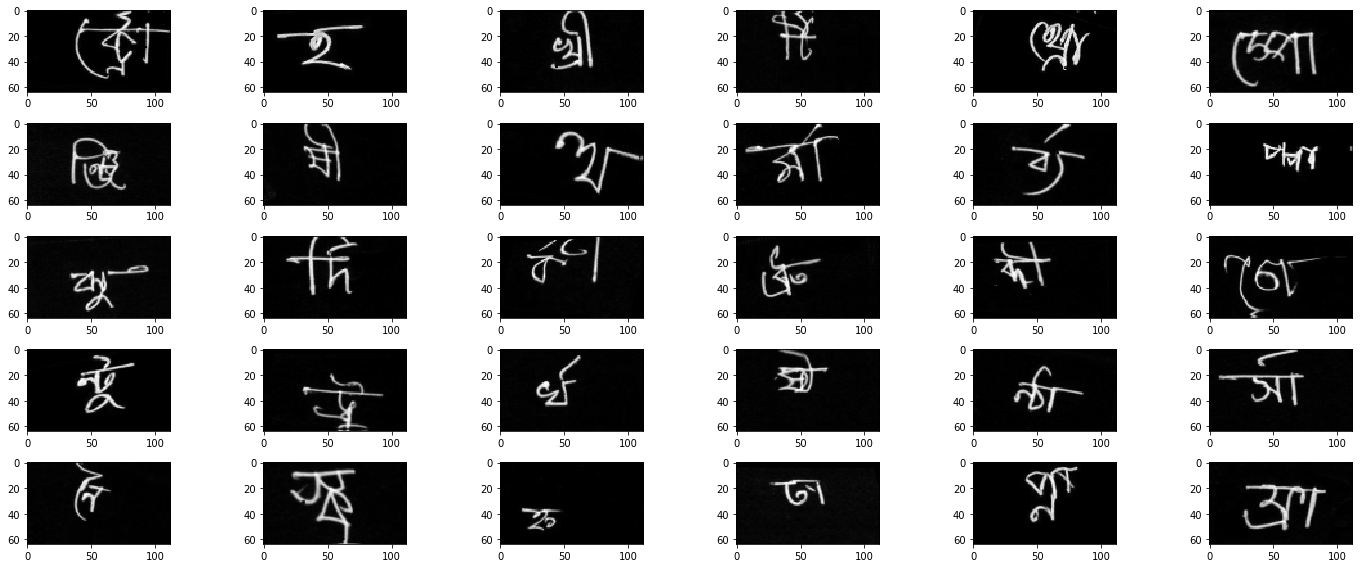

<Figure size 432x288 with 0 Axes>

In [10]:
# train_transform
nrow, ncol = 5, 6

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    image, _, _, _, _ = ds_train[i]
    image = np.transpose(image, (1, 2, 0))
    ax.imshow(image, cmap='Greys')
#     ax.set_title(f'label: {label}')
plt.tight_layout()
plt.show()
plt.savefig('bengaliai.png')

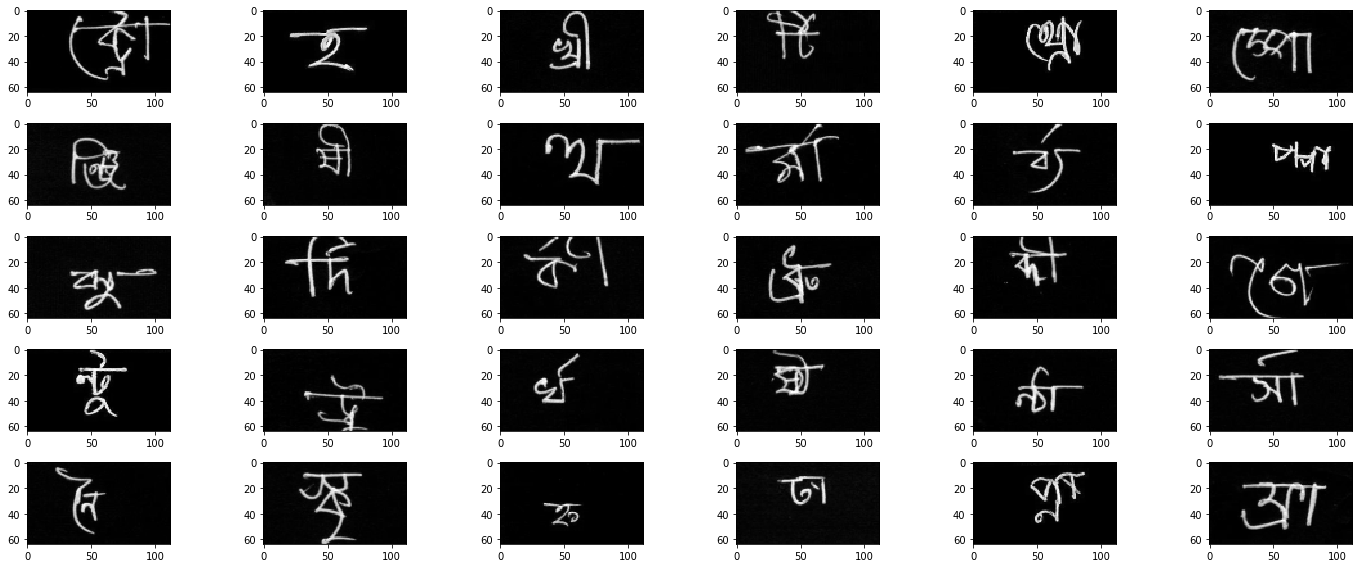

<Figure size 432x288 with 0 Axes>

In [11]:
# val_transform
nrow, ncol = 5, 6

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    image, _, _, _, _ = ds_val[i]
    image = np.transpose(image, (1, 2, 0))
    ax.imshow(image, cmap='Greys')
#     ax.set_title(f'label: {label}')
plt.tight_layout()
plt.show()
plt.savefig('bengaliai.png')